In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import numpy as np
import scipy.signal

In [2]:
def plot_weights(weights, rows, columns):    
    fig, ax = plt.subplots(rows, columns, figsize=(12,4))
    for i in range(rows):
        for j in range(columns):
            filter_idx = columns*i + j
            
            curr_weights = weights[filter_idx,:,:,:]            
#             f_min, f_max = curr_weights.min(), curr_weights.max()
#             curr_weights = (curr_weights - f_min) / (f_max - f_min)
            
            concat = np.hstack((curr_weights[0], curr_weights[1]))
    
            a=ax[i,j].imshow(concat, cmap="gray")
            
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
            
            axins = inset_axes(ax[i,j],
               width="5%",  # width = 5% of parent_bbox width
               height="100%",  # height : 50%
               loc='lower left',
               bbox_to_anchor=(1.05, 0., 1, 1),
               bbox_transform=ax[i,j].transAxes,
               borderpad=0,
               )
            fig.colorbar(a, cax=axins)

    fig.tight_layout()

def plot_xcorrs(xcorrs, rows, columns):
    fig, ax = plt.subplots(rows, columns, figsize=(12,8))
    
    for i in range(rows):
        for j in range(columns):
            idx = columns*i + j
            curr_xcorr = xcorrs[idx]
#             f_min, f_max = curr_xcorr.min(), curr_xcorr.max()
#             curr_xcorr = (curr_xcorr - f_min) / (f_max - f_min)
            
            a=ax[i,j].imshow(curr_xcorr, cmap="gray")
#             ax[i,j].set_xticks([])
#             ax[i,j].set_yticks([])
            ax[i,j].set_title("IDX of max: {}".format(np.unravel_index(np.argmax(curr_xcorr), curr_xcorr.shape)))

            axins = inset_axes(ax[i,j],
               width="5%",  # width = 5% of parent_bbox width
               height="100%",  # height : 50%
               loc='lower left',
               bbox_to_anchor=(1.05, 0., 1, 1),
               bbox_transform=ax[i,j].transAxes,
               borderpad=0,
               )
            fig.colorbar(a, cax=axins)
            
    fig.tight_layout()

def compute_cross_correlation(weights):
    xcorrs = list()
    for i in range(weights.shape[0]):
        curr_weights = weights[i,:,:,:]
        left = (curr_weights[0] - np.mean(curr_weights[0])) / np.std(curr_weights[0])
        right = (curr_weights[1] - np.mean(curr_weights[1])) / np.std(curr_weights[1])
        xcorr = scipy.signal.correlate2d(left, right)
        xcorrs.append(xcorr)
    return xcorrs

(16, 2, 19, 19)


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


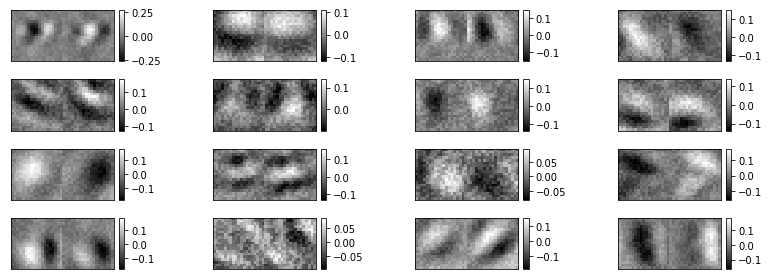

In [3]:
exp_id = "exp09"
weights = np.load("../tmp/{}_simple_unit_weights.npy".format(exp_id))
print(weights.shape)
plot_weights(weights, 4, 4)

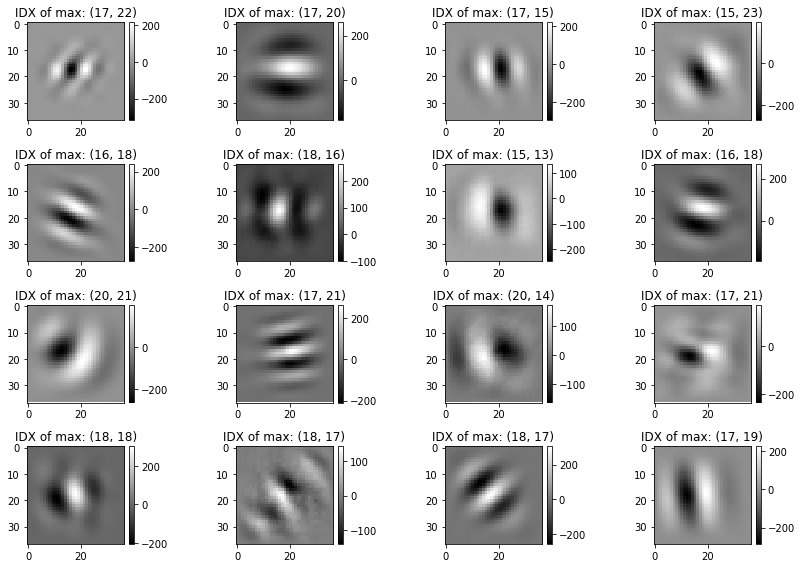

In [4]:
xcorrs = compute_cross_correlation(weights)
plot_xcorrs(xcorrs, 4, 4)

(24, 2, 19, 19)


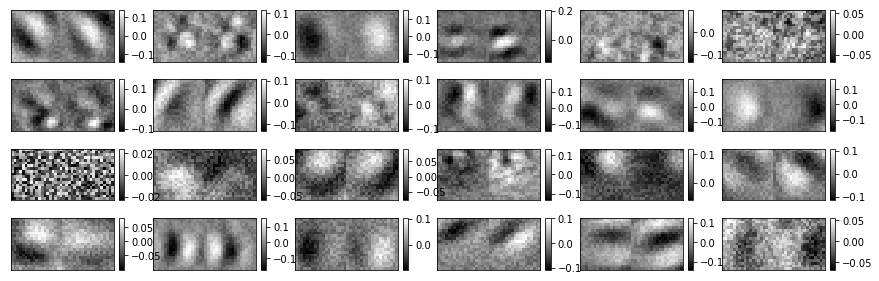

In [5]:
exp_id = "exp08"
weights = np.load("../tmp/{}_simple_unit_weights.npy".format(exp_id))
print(weights.shape)
plot_weights(weights, 4, 6)

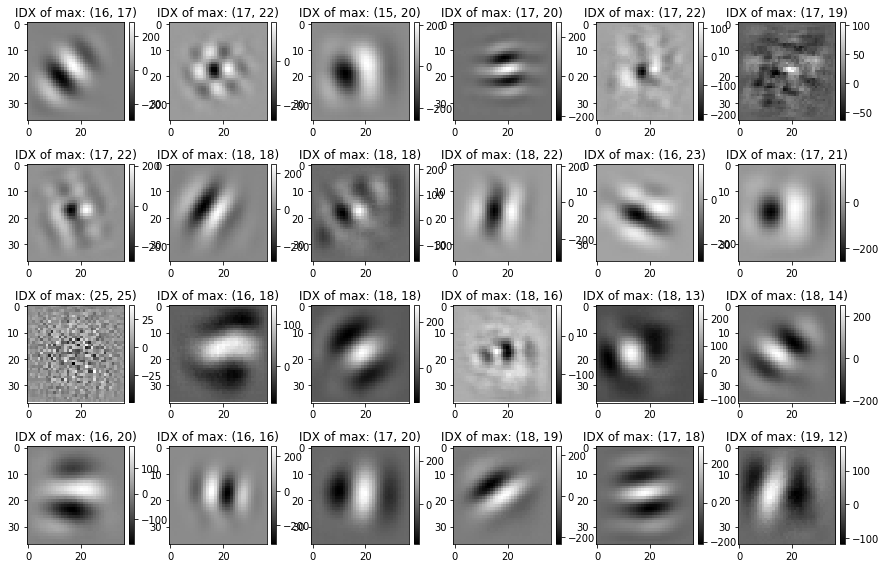

In [6]:
xcorrs = compute_cross_correlation(weights)
plot_xcorrs(xcorrs, 4, 6)

(16, 2, 19, 19)


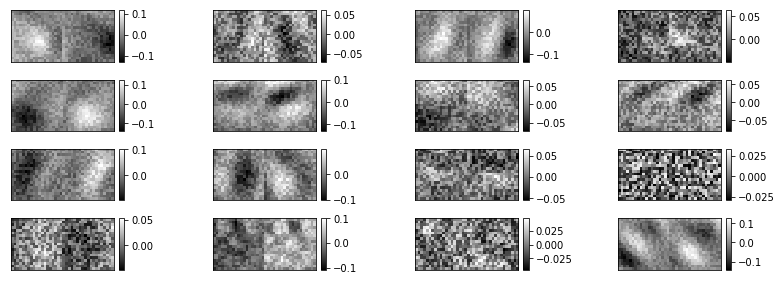

In [7]:
exp_id = "exp10"
weights = np.load("../tmp/{}_simple_unit_weights.npy".format(exp_id))
print(weights.shape)
plot_weights(weights, 4, 4)

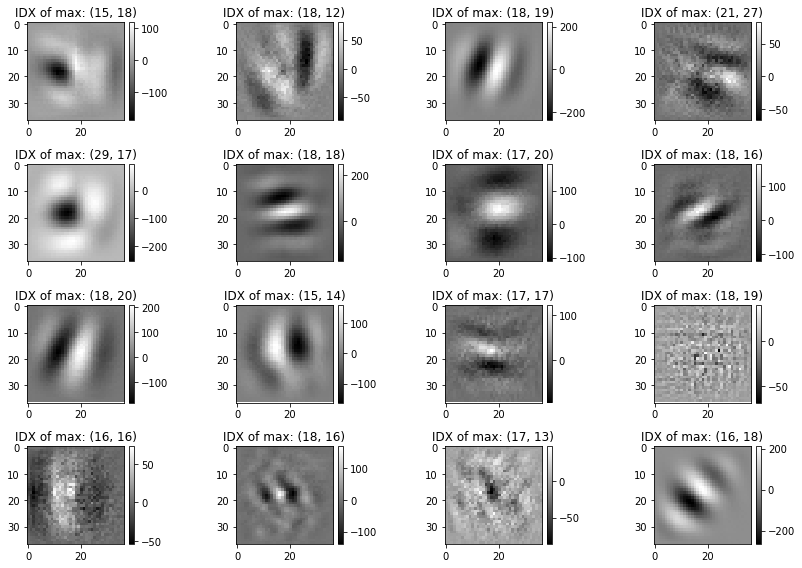

In [8]:
xcorrs = compute_cross_correlation(weights)
plot_xcorrs(xcorrs, 4, 4)

(16, 2, 19, 19)


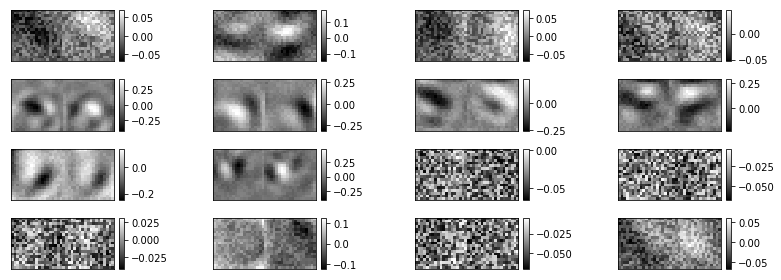

In [9]:
exp_id = "test"
weights = np.load("../tmp/{}_simple_unit_weights.npy".format(exp_id))
print(weights.shape)
plot_weights(weights, 4, 4)

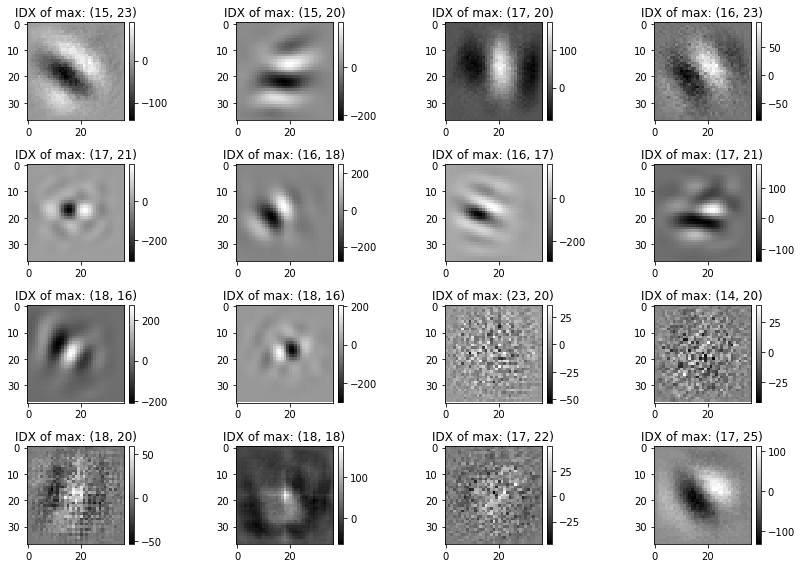

In [10]:
xcorrs = compute_cross_correlation(weights)
plot_xcorrs(xcorrs, 4, 4)

In [ ]:
exp_id = "exp11_nlatent_50"
weights = np.load("../tmp/{}_simple_unit_weights.npy".format(exp_id))
print(weights.shape)
plot_weights(weights, 4, 4)

In [ ]:
xcorrs = compute_cross_correlation(weights)
plot_xcorrs(xcorrs, 4, 4)